<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/Predict_the_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Problem statement**

Halloween is a night of costumes, fun, and candy that takes place every year on October 31. On this day people dress up in various costumes that have a scary overtone and go trick-or-treating to gather candy.

This year, on Halloween, there is a carnival in your neighborhood. Besides the various games, there are also 50 stalls that are selling various products, which fall under various categories.

**Your task is to predict the selling price of the products based on the provided features.**

In [6]:
!pip install --upgrade pycaret

     |████████████████████████████████| 256kB 5.6MB/s 
     |████████████████████████████████| 13.9MB 237kB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
     |████████████████████████████████| 1.6MB 42.5MB/s 
     |████████████████████████████████| 266kB 42.5MB/s 
     |████████████████████████████████| 6.8MB 47.1MB/s 
     |████████████████████████████████| 148.9MB 83kB/s 
     |████████████████████████████████| 66.3MB 60kB/s 
     |████████████████████████████████| 1.8MB 47.2MB/s 
     |████████████████████████████████| 174kB 48.6MB/s 
     |████████████████████████████████| 276kB 47.1MB/s 
     |████████████████████████████████| 1.1MB 39.9MB/s 
     |████████████████████████████████| 153kB 43.8MB/s 
     |████████████████████████████████| 337kB 47.1MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 163kB 49.3MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 2.1MB 35.6MB/s

In [2]:
!unzip "/content/7b9447c625cf11eb.zip"

Archive:  /content/7b9447c625cf11eb.zip
   creating: dataset/
  inflating: dataset/train.csv       
  inflating: dataset/sample_submission.csv  
  inflating: dataset/test.csv        


In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set()
#Encoding Libraries
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#Feature Selection
from sklearn.feature_selection import VarianceThreshold

from scipy.stats import norm

#Library for Model Selection
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor

#Imporing Library for Tree based Model Building
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve , KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

#Importing Libraries for scoring
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


import warnings
warnings.filterwarnings('ignore')


In [4]:
#Loading the Dataset
train_original = pd.read_csv('/content/dataset/train.csv')
test_original = pd.read_csv('/content/dataset/test.csv')
sample_submission = pd.read_csv('/content/dataset/sample_submission.csv')

In [5]:
#Original should remain intact
train = train_original.copy()
test = test_original.copy()

In [6]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [7]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


**Train Data Summary Statistics**

In [8]:
#Lets checkout the dataypes of the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        6368 non-null   object 
 1   Stall_no          6363 non-null   float64
 2   instock_date      6368 non-null   object 
 3   Market_Category   6368 non-null   int64  
 4   Customer_name     6157 non-null   object 
 5   Loyalty_customer  6368 non-null   object 
 6   Product_Category  6368 non-null   object 
 7   Grade             6368 non-null   int64  
 8   Demand            6368 non-null   int64  
 9   Discount_avail    6330 non-null   float64
 10  charges_1         6170 non-null   float64
 11  charges_2 (%)     6163 non-null   float64
 12  Minimum_price     6330 non-null   float64
 13  Maximum_price     6025 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 746.4+ KB


In [10]:
train.describe(include='O')

,Product_id,instock_date,Customer_name,Loyalty_customer,Product_Category
count,6368,6368,6157,6368,6368
unique,6368,5350,5900,2,10
top,BBAEGG6DGZUDGSQW,2015-08-18 22:08:56.000,Camryn,Yes,Pet_care
freq,1,6,2,3887,682


In [11]:
train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


**Missing Data**

In [8]:
def check_missing_data(df,label):
  print(f'Missing Information : {label} data')
  print(df.isnull().sum()[df.isnull().sum() > 0])
  return df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

In [9]:
 train_null_cols = check_missing_data(train,'train')

Missing Information : train data
Stall_no            5
Customer_name     211
Discount_avail     38
charges_1         198
charges_2 (%)     205
Minimum_price      38
Maximum_price     343
Selling_Price      41
dtype: int64


In [9]:
train_null_cols

['Stall_no',
 'Customer_name',
 'Discount_avail',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'Selling_Price']

In [10]:
test_null_cols = check_missing_data(test,'test')

Missing Information : test data
Stall_no          1
Customer_name    53
charges_1        36
charges_2 (%)     5
Minimum_price    14
dtype: int64


In [11]:
test_null_cols

['Stall_no', 'Customer_name', 'charges_1', 'charges_2 (%)', 'Minimum_price']

**Imputing Missing Values**

**Exploratory Data Analysis**

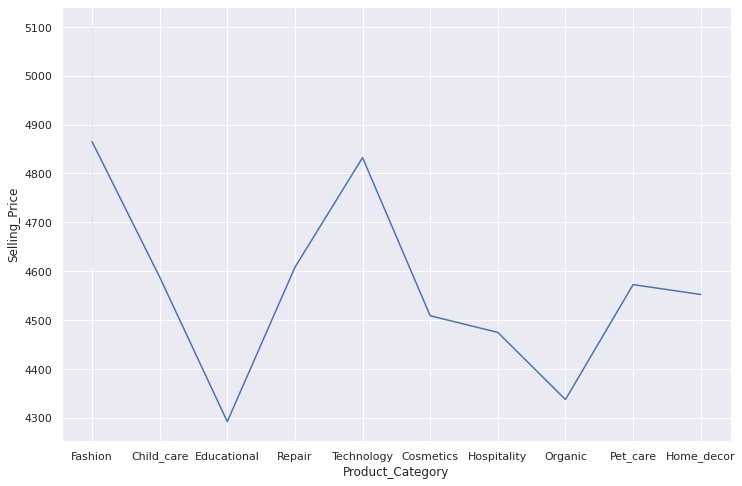

In [40]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Product_Category',y='Selling_Price',data=train)

In [41]:
train['Loyalty_customer'].value_counts(normalize=True)

Yes    0.610396
No     0.389604
Name: Loyalty_customer, dtype: float64

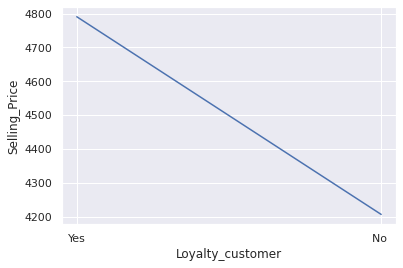

In [42]:
sns.lineplot(x='Loyalty_customer',y='Selling_Price',data=train)

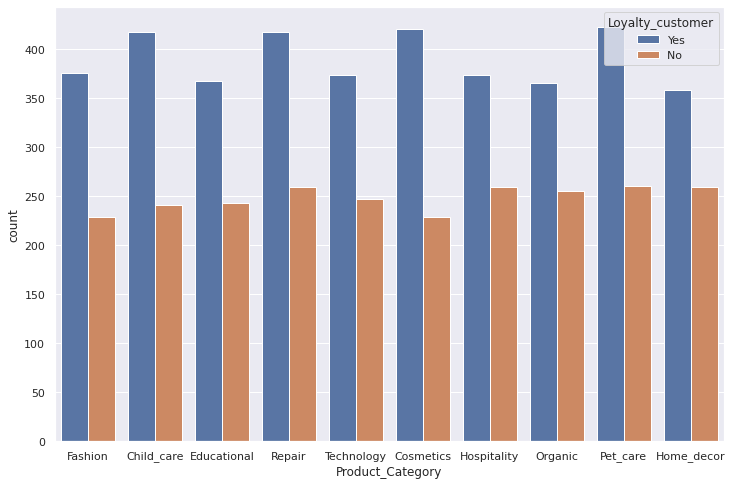

In [44]:
plt.figure(figsize=(12,8))
sns.countplot(x='Product_Category',data=train,hue='Loyalty_customer')

In [25]:
def sns_plot(col_list,label):
  num_col_null = []
  num_cat_null = []
  for col in col_list:
    if label == 'train':
       if train[col].dtypes == 'O':
         num_cat_null.append(col)
       else:
         num_col_null.append(col)
    else:
      if test[col].dtypes == 'O':
         num_cat_null.append(col)
      else:
         num_col_null.append(col)

  return num_cat_null,num_col_null
    



In [26]:
train_cat_null,train_num_null =sns_plot(train_null_cols,"train")

In [27]:
train_cat_null,train_num_null

(['Customer_name'],
 ['Stall_no',
  'Discount_avail',
  'charges_1',
  'charges_2 (%)',
  'Minimum_price',
  'Maximum_price',
  'Selling_Price'])

In [33]:
test_cat_null,test_num_null =sns_plot(test_null_cols,"test")

In [34]:
test_cat_null,test_num_null

(['Customer_name'],
 ['Stall_no', 'charges_1', 'charges_2 (%)', 'Minimum_price'])

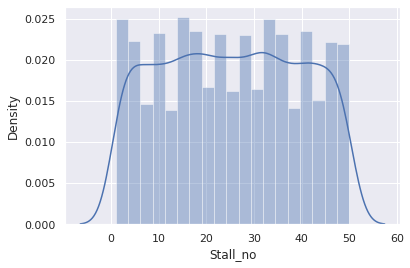

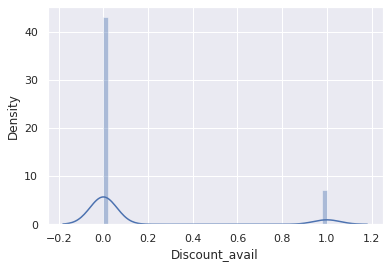

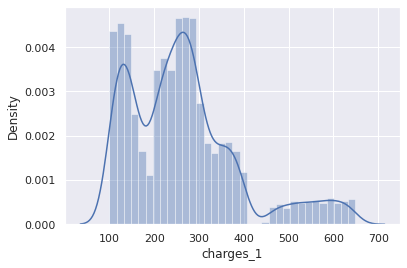

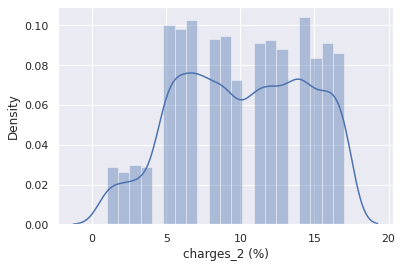

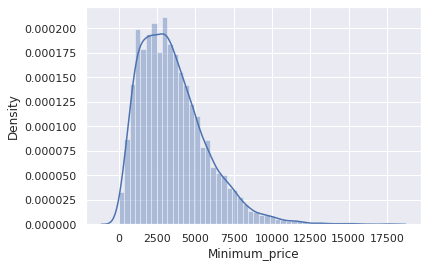

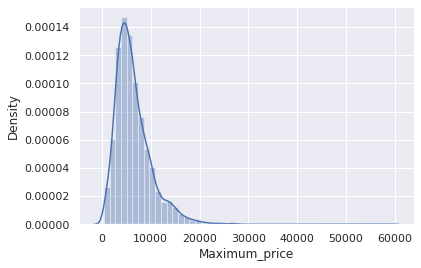

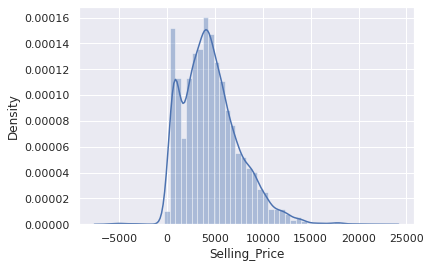

In [30]:
for col in train_num_null:
  sns.distplot(train[col])
  plt.show()

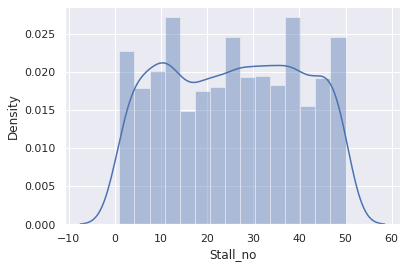

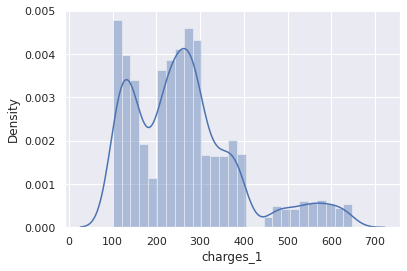

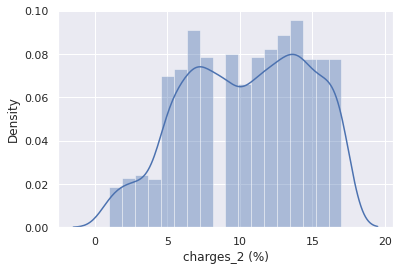

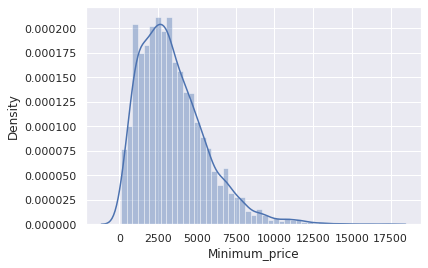

In [35]:
for col in test_num_null:
  sns.distplot(test[col])
  plt.show()

#### **Imputing Missing Values**

In [12]:
#Represents whether a product is being sold at a discount or not
train['Discount_avail'] = train['Discount_avail'].fillna(0)
test['Discount_avail'] = test['Discount_avail'].fillna(0)

In [13]:
#Represents the types of charges applied on the products in the carnival
train['charges_1'] = train['charges_1'].fillna((train['charges_1'].mean()))
test['charges_1'] = test['charges_1'].fillna((test['charges_1'].mean()))

In [14]:
#Represents the types of charges applied on the products in the carnival in percentage
train = train.rename(columns={'charges_2 (%)': 'charges_2'})
test = test.rename(columns={'charges_2 (%)': 'charges_2'})
train['charges_2'] = train['charges_2'].fillna((train['charges_1'].median())) #Initially mean
test['charges_2'] = test['charges_1'].fillna((test['charges_1'].median()))

In [15]:
#Represents the minimum price of a product
prod_min_purchase= train.groupby('Product_Category')['Minimum_price'].median().to_dict()
#Represents the maximum price of a product
prod_max_purchase= train.groupby('Product_Category')['Maximum_price'].median().to_dict()

In [16]:
prod_max_purchase

{'Child_care': 5745.5,
 'Cosmetics': 5752.0,
 'Educational': 5407.0,
 'Fashion': 5780.5,
 'Home_decor': 5502.0,
 'Hospitality': 5605.0,
 'Organic': 5509.0,
 'Pet_care': 5731.0,
 'Repair': 5799.5,
 'Technology': 5495.0}

In [105]:
prod_min_purchase

{'Child_care': 3164.0,
 'Cosmetics': 3223.0,
 'Educational': 3073.0,
 'Fashion': 3207.5,
 'Home_decor': 3162.0,
 'Hospitality': 3105.0,
 'Organic': 3038.5,
 'Pet_care': 3161.0,
 'Repair': 3244.0,
 'Technology': 3302.5}

In [17]:
train['Minimum_price'] = train.groupby('Product_Category')['Minimum_price'].apply(lambda x: x.fillna(x.mean()))

In [18]:
test['Minimum_price'] = test.groupby('Product_Category')['Minimum_price'].apply(lambda x: x.fillna(x.mean()))

In [19]:
train['Maximum_price'] = train.groupby('Product_Category')['Maximum_price'].apply(lambda x: x.fillna(x.mean()))

In [20]:
train.isnull().sum()[train.isnull().sum() > 0]

Stall_no           5
Customer_name    211
Selling_Price     41
dtype: int64

In [21]:
#Avoiding the Null Selling Prices
train = train[~train['Selling_Price'].isna()]
train.shape

(6327, 15)

In [22]:
check_missing_data(train,'train')
check_missing_data(test,'test')

Missing Information : train data
Stall_no           5
Customer_name    207
dtype: int64
Missing Information : test data
Stall_no          1
Customer_name    53
dtype: int64


['Stall_no', 'Customer_name']

In [23]:
final_cols = [cols for cols in train.columns if cols not in ['Stall_no','Customer_name']]
final_cols

['Product_id',
 'instock_date',
 'Market_Category',
 'Loyalty_customer',
 'Product_Category',
 'Grade',
 'Demand',
 'Discount_avail',
 'charges_1',
 'charges_2',
 'Minimum_price',
 'Maximum_price',
 'Selling_Price']

In [24]:
train = train[[cols for cols in train.columns if cols not in ['Stall_no','Customer_name']]]

In [25]:
test = test[[cols for cols in test.columns if cols not in ['Stall_no','Customer_name']]]

In [26]:
check_missing_data(train,'train')
check_missing_data(test,'test')

Missing Information : train data
Series([], dtype: int64)
Missing Information : test data
Series([], dtype: int64)


[]

In [27]:
train.head()

,Product_id,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,2015-08-22 18:36:12.000,2,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,2016-03-27 21:19:13.000,24,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,2015-08-18 19:25:22.000,447,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,2016-03-28 21:53:01.000,23,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,2016-03-29 22:58:53.000,63,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [28]:
train['instock_date'] = pd.to_datetime(train['instock_date'])
test['instock_date'] = pd.to_datetime(test['instock_date'])

**Exploratory Data Analysis**

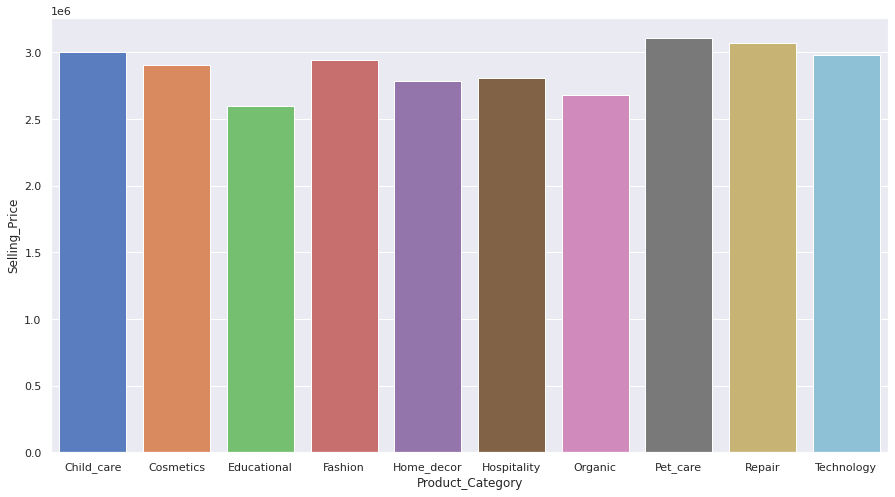

In [138]:
#Function to analye how Purchase amount is dependent upon Product categories.
fig = plt.figure(figsize=(15,8))
most_freq_category = train.groupby('Product_Category')['Selling_Price'].sum().reset_index()
sns.barplot(x='Product_Category',y='Selling_Price',data = most_freq_category,palette="muted")

**Monthly Product Category sales**

In [139]:
tmp = train.copy()
tmp.columns

Index(['Product_id', 'instock_date', 'Market_Category', 'Loyalty_customer', 'Product_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2', 'Minimum_price', 'Maximum_price', 'Selling_Price'], dtype='object')

In [141]:
tmp['Month'] = tmp['instock_date'].dt.month

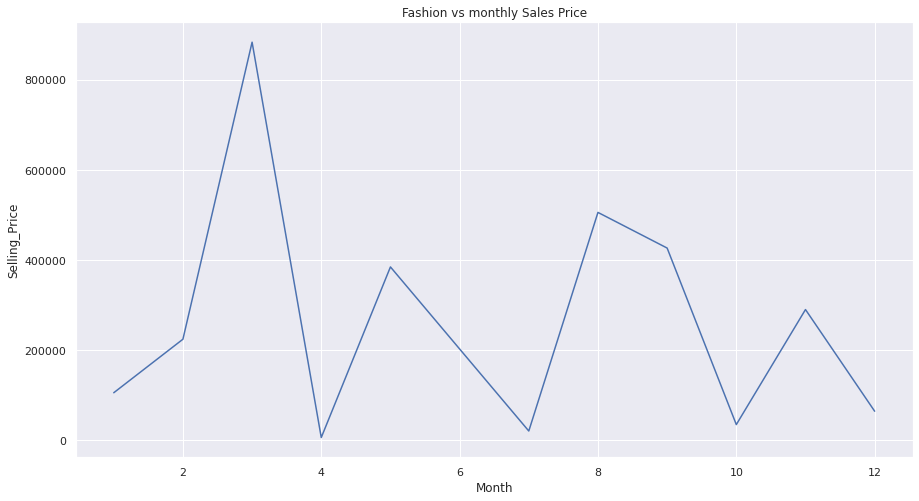

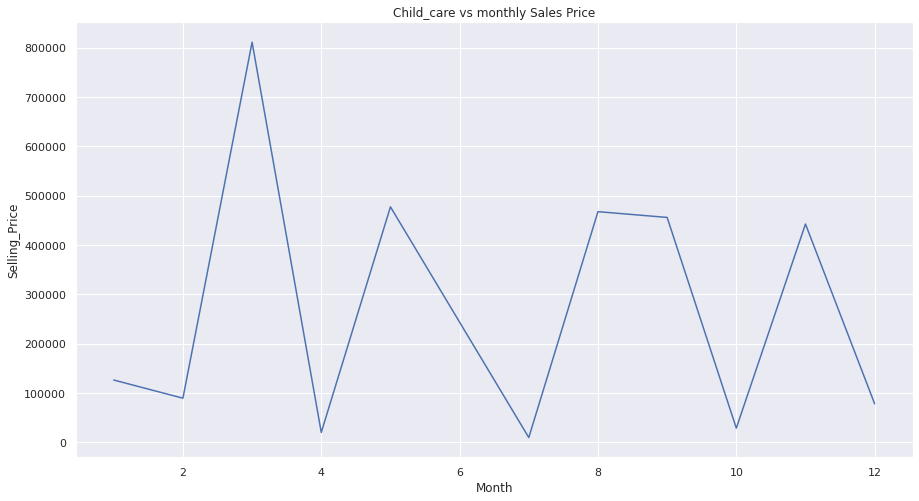

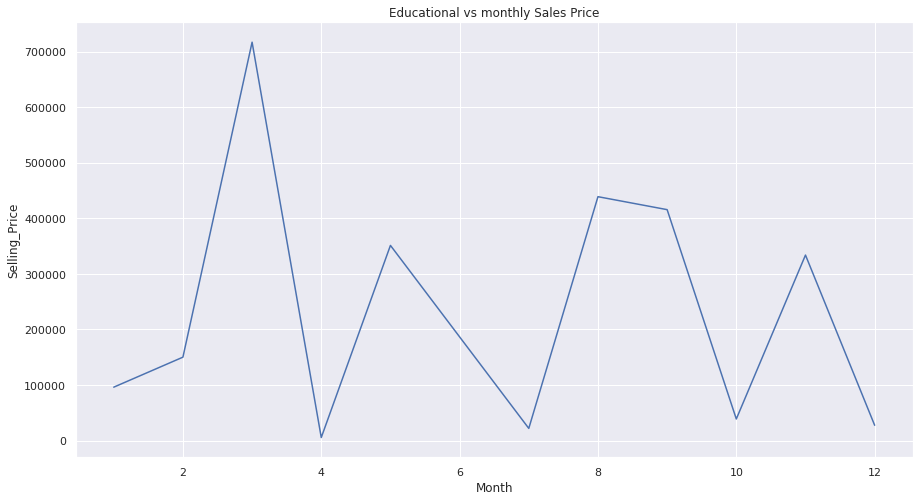

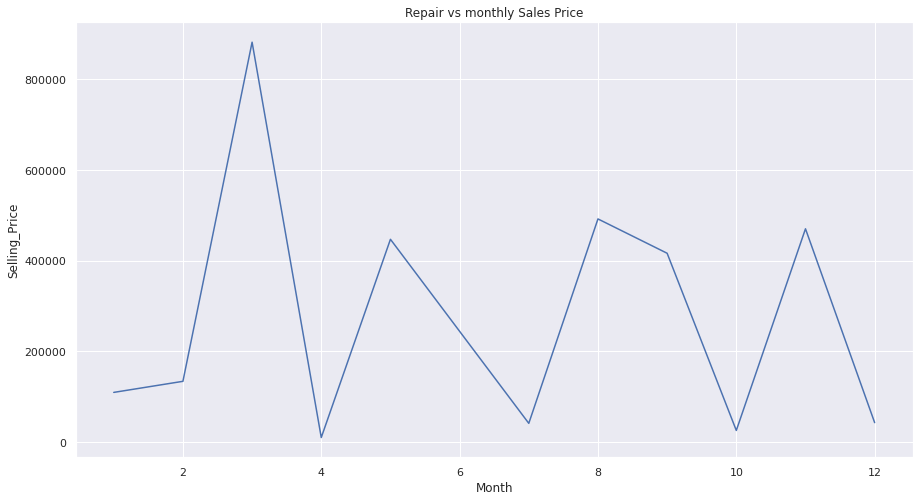

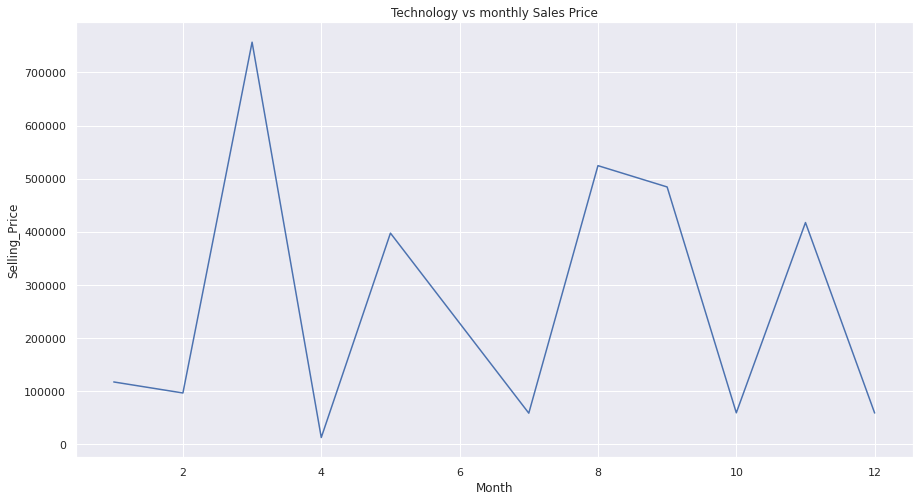

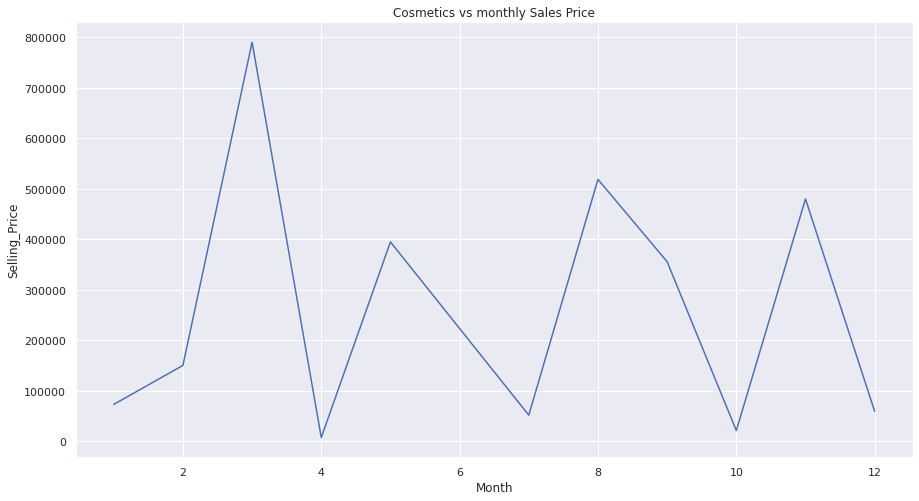

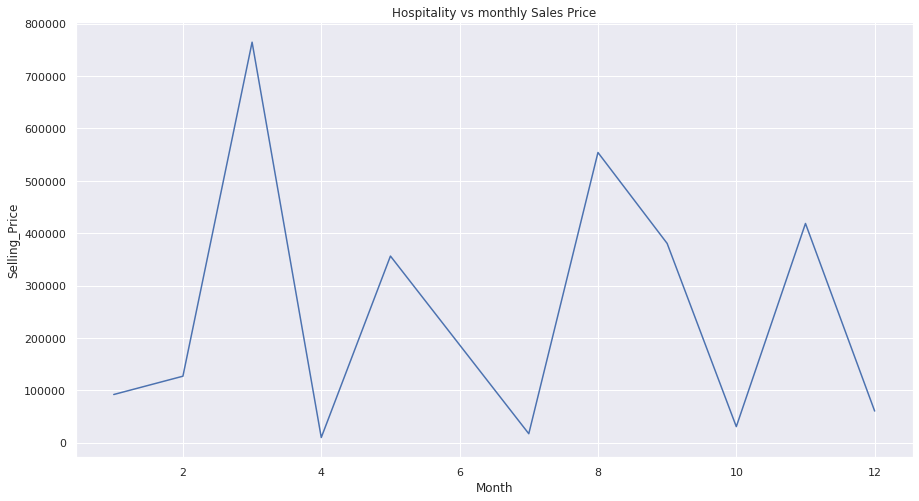

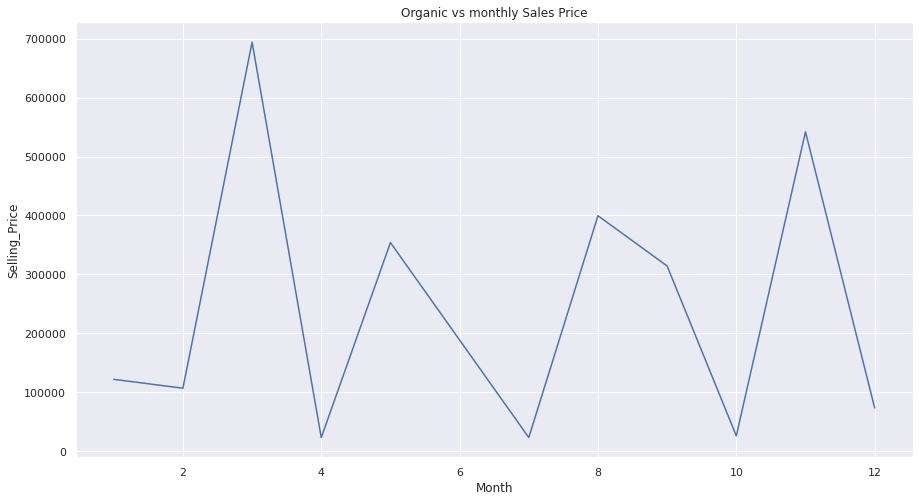

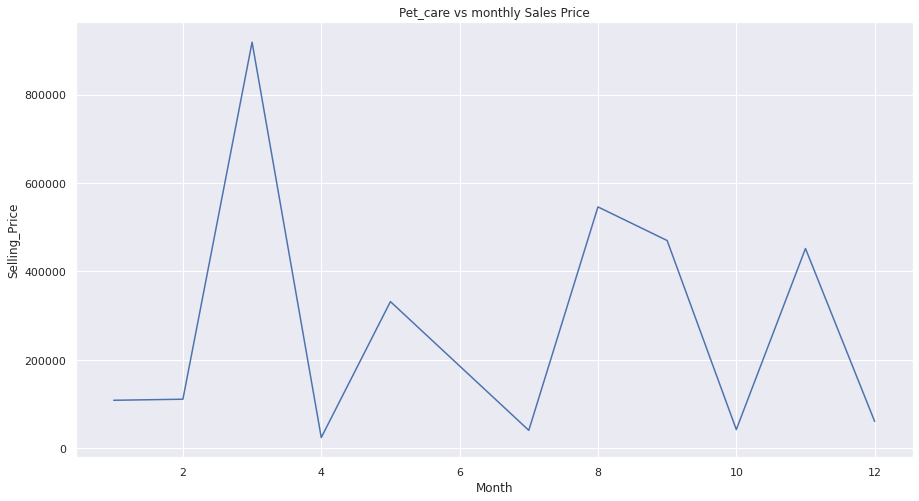

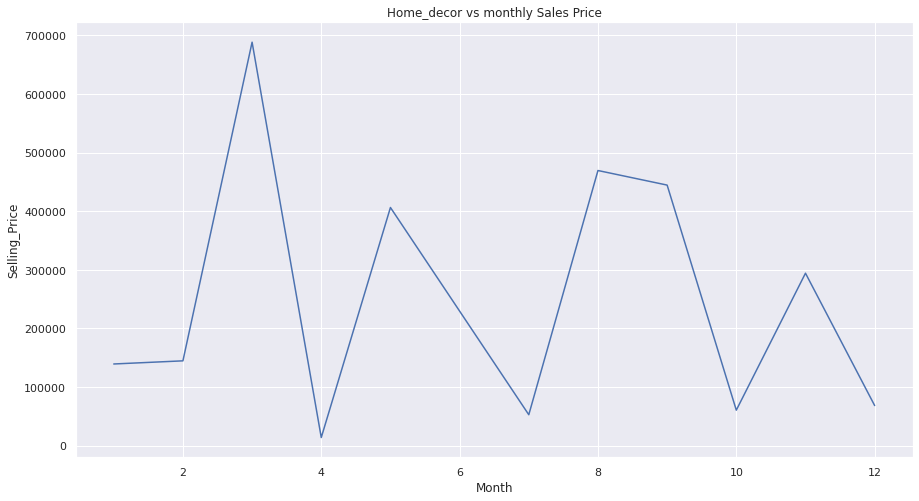

In [148]:

most_freq_category_monthly = tmp.groupby(['Product_Category','Month'])['Selling_Price'].sum().reset_index()
for cat in tmp['Product_Category'].unique():
  fig = plt.figure(figsize=(15,8))
  sns.lineplot(x='Month',y='Selling_Price',data=most_freq_category_monthly[most_freq_category_monthly['Product_Category']==cat])
  plt.title(f"{cat} vs monthly Sales Price")
  plt.show()

In [ ]:
sns.barplot(x='Product_Category',y='Selling_Price',data = most_freq_category,palette="muted")

**Label Encoding**

In [29]:
#Label Encoding of loyality customers 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for cat_var in ['Loyalty_customer','Product_Category']:
    train[cat_var] = le.fit_transform(train[cat_var])
    test[cat_var] = le.fit_transform(test[cat_var])

In [26]:
train['Product_Category'].value_counts(normalize=True)

7    0.107318
8    0.105263
0    0.103525
1    0.101786
5    0.099257
6    0.097677
9    0.097519
4    0.096570
2    0.095622
3    0.095464
Name: Product_Category, dtype: float64

** Feature Engineering**

In [30]:
def create_date_features(data):
    data['instock_date_day'] = data['instock_date'].dt.day
    data['instock_date_quarter'] = data['instock_date'].dt.quarter
    data['instock_date_month'] = data['instock_date'].dt.month
    data['instock_date_week'] = data['instock_date'].dt.week
    data['instock_date_weekday'] = data['instock_date'].dt.weekday
    data['instock_date_year'] = data['instock_date'].dt.year
    data['instock_date_hour'] = data['instock_date'].dt.hour
    data['instock_date_minute'] = data['instock_date'].dt.minute
    return data

In [31]:
train = create_date_features(train)
test = create_date_features(test)

In [32]:
def create_derived_cols(data):
    data['Diff'] = data['Maximum_price'] - data['Minimum_price']
    data['Total'] = data['Maximum_price'] + data['Minimum_price']
    data['Average_price'] = (data['Maximum_price'] + data['Minimum_price'])/2
    data['Max_Min_ratio'] = data['Maximum_price'] / data['Minimum_price']
    data['Max_norm'] = (data['Maximum_price']  - data['Maximum_price'].min())/ (data['Maximum_price'].max() - data['Maximum_price'].min())
    data['Min_norm'] = (data['Minimum_price']  - data['Minimum_price'].min())/ (data['Minimum_price'].max() - data['Minimum_price'].min())
    data['Max_Min_mul'] = data['Maximum_price'] * data['Minimum_price']
    return data

In [33]:
train = create_derived_cols(train)
test = create_derived_cols(test)

In [34]:
features = [cols for cols in train.columns if cols != 'Selling_Price']

In [35]:
train.head()

,Product_id,instock_date,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price,instock_date_day,instock_date_quarter,instock_date_month,instock_date_week,instock_date_weekday,instock_date_year,instock_date_hour,instock_date_minute,Diff,Total,Average_price,Max_Min_ratio,Max_norm,Min_norm,Max_Min_mul
0,BRAE2NF6JA5GUEXG,2015-08-22 18:36:12,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,22,3,8,34,5,2015,18,36,1730.0,7696.0,3848.0,1.579953,0.073774,0.169634,14058879.0
1,TUNE8SFB6RJN2HSD,2016-03-27 21:19:13,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,27,1,3,12,6,2016,21,19,2857.0,17847.0,8923.5,1.381187,0.170319,0.426304,77588240.0
2,BRAEAR7WZPQGPBZU,2015-08-18 19:25:22,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,18,3,8,34,1,2015,19,25,1557.0,13061.0,6530.5,1.270688,0.118220,0.327152,42041368.0
3,WATDZ2ZQ8JPDHCTJ,2016-03-28 21:53:01,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,28,1,3,13,0,2016,21,53,15724.0,25904.0,12952.0,4.089194,0.349438,0.289493,105943260.0
4,JWSEBUKYQPMBZ3RK,2016-03-29 22:58:53,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,29,1,3,13,1,2016,22,58,6831.0,11691.0,5845.5,3.811111,0.151640,0.138176,22504230.0


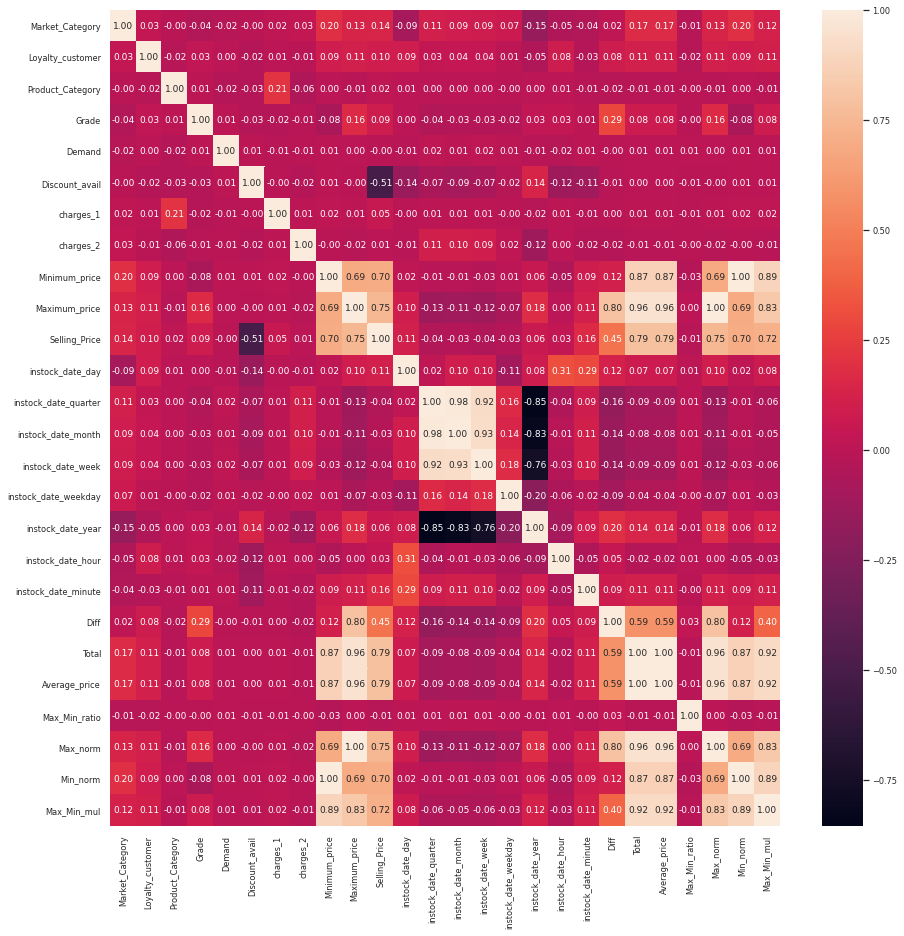

In [36]:
corr = train.corr()
plt.figure(figsize=(15,15))
sns.set(style='darkgrid',font_scale=0.75)
sns.heatmap(corr,annot=True,fmt='.2f')

**Remove Multicolinearity**

In [37]:
def check_mult_col(df,target,threshold =0.80):
  corr =  train.drop(target,axis=1).corr().abs()
  up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  #print(up_tri)
  #find all features having a correlation > threshold
  correlated_features = [col for col in up_tri.columns if any(up_tri[col] > threshold)]
  #print(f"The correlated features which can be dropped are :{correlated_features}")
  return correlated_features

In [38]:
drop_features = check_mult_col(train,'Selling_Price',0.80)

In [39]:
drop_features

['instock_date_month',
 'instock_date_week',
 'instock_date_year',
 'Total',
 'Average_price',
 'Max_norm',
 'Min_norm',
 'Max_Min_mul']

In [40]:
train = train.drop(drop_features,axis=1)
test = test.drop(drop_features,axis=1)

#### **Feature Importance**

In [43]:
train.describe(include='O')

,Product_id
count,6327
unique,6327
top,SNDEHZH4RXCE8AGJ
freq,1


In [41]:
X = train.drop(['Selling_Price','Product_id','instock_date'],axis=1)
Y = train['Selling_Price']

In [42]:
X.head()

,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,instock_date_day,instock_date_quarter,instock_date_weekday,instock_date_hour,instock_date_minute,Diff,Max_Min_ratio
0,2,1,3,1,68,0.0,376.0,11.0,2983.0,4713.0,22,3,5,18,36,1730.0,1.579953
1,24,1,3,0,51,0.0,397.0,12.0,7495.0,10352.0,27,1,6,21,19,2857.0,1.381187
2,447,1,0,0,10,0.0,250.0,9.0,5752.0,7309.0,18,3,1,19,25,1557.0,1.270688
3,23,1,2,2,48,0.0,144.0,13.0,5090.0,20814.0,28,1,0,21,53,15724.0,4.089194
4,63,1,8,1,35,1.0,211.0,4.0,2430.0,9261.0,29,1,1,22,58,6831.0,3.811111


In [43]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfreg = RandomForestRegressor(random_state=42)
rfcev = RFECV(estimator=rfreg,step=1,cv=10,scoring='neg_mean_squared_error')
rfcev.fit(X,Y)

RFECV(cv=10, estimator=RandomForestRegressor(random_state=42),
      scoring='neg_mean_squared_error')

In [44]:
print(f'Optimal number of features: {format(rfcev.n_features_)}')

Optimal number of features: 9


In [62]:
rfcev.estimator_.feature_importances_

array([0.00234279, 0.00304416, 0.28765775, 0.00414402, 0.16509063,
       0.52520046, 0.00260529, 0.00476785, 0.00514704])

In [52]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [45]:
rfcev.ranking_

array([2, 9, 6, 1, 1, 1, 1, 5, 1, 1, 1, 7, 8, 4, 3, 1, 1])

In [46]:
features = X.columns

In [53]:
scoring_df = pd.DataFrame({'Features':features,'Rank':rfcev.ranking_})
optimal_features = scoring_df[(scoring_df['Rank'] == 1) |(scoring_df['Rank'] == 2)]['Features'].values.tolist()
optimal_features 

['Market_Category',
 'Grade',
 'Demand',
 'Discount_avail',
 'charges_1',
 'Minimum_price',
 'Maximum_price',
 'instock_date_day',
 'Diff',
 'Max_Min_ratio']

In [49]:
scoring_df = scoring_df.sort_values(by='Rank')
scoring_df

,Features,Rank
8,Minimum_price,1
3,Grade,1
4,Demand,1
16,Max_Min_ratio,1
5,Discount_avail,1
15,Diff,1
9,Maximum_price,1
10,instock_date_day,1
6,charges_1,1
0,Market_Category,2


In [56]:
train = train[optimal_features+['Selling_Price']]
test = test[optimal_features]

In [57]:
train.head()

,Market_Category,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,instock_date_day,Diff,Max_Min_ratio,Selling_Price
0,2,1,68,0.0,376.0,2983.0,4713.0,22,1730.0,1.579953,4185.947700
1,24,0,51,0.0,397.0,7495.0,10352.0,27,2857.0,1.381187,9271.490256
2,447,0,10,0.0,250.0,5752.0,7309.0,18,1557.0,1.270688,6785.701362
3,23,2,48,0.0,144.0,5090.0,20814.0,28,15724.0,4.089194,13028.917824
4,63,1,35,1.0,211.0,2430.0,9261.0,29,6831.0,3.811111,906.553935


In [63]:
train.to_csv('final_train.csv',index=False)
test.to_csv('final_test.csv',index=False)

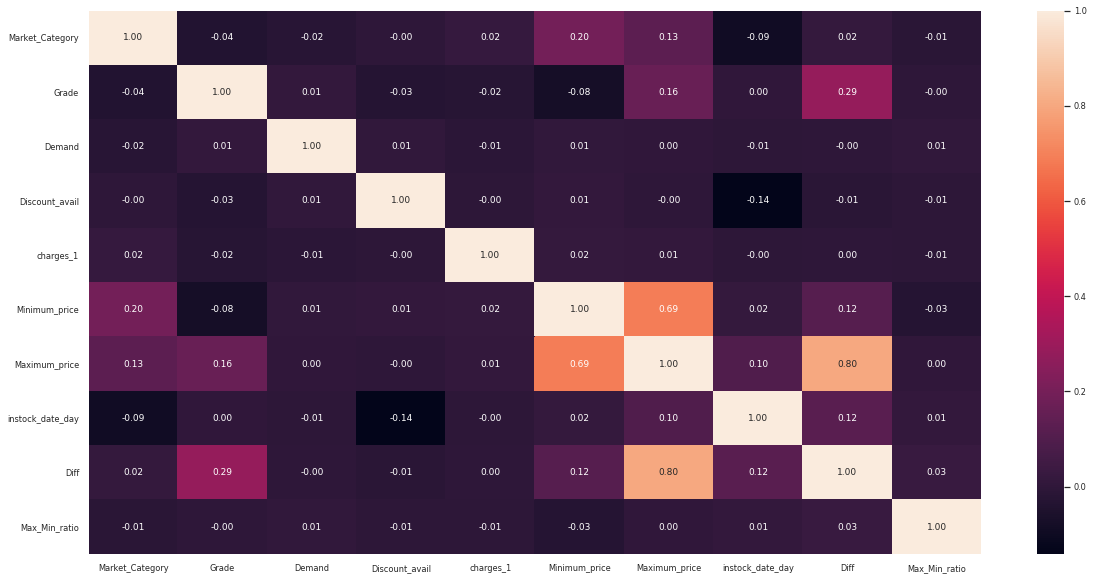

In [65]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(train[optimal_features].corr(),annot=True,fmt='.2f')

In [66]:
from pycaret.regression import *
reg1 = setup(data = train, target = 'Selling_Price')

,Description,Value
0,session_id,364
1,Target,Selling_Price
2,Original Data,"(6327, 11)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4428, 13)"


In [68]:
top3 = compare_models(exclude = ['ransac','lr','br','par','knn','lasso','llar','omp','huber'], n_select = 3)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,152.4658,2.901009e+05,508.9638,0.9670,0.1141,0.0677,1.241
catboost,CatBoost Regressor,168.2010,3.001052e+05,518.3386,0.9658,0.1616,0.0864,2.554
lightgbm,Light Gradient Boosting Machine,196.4332,3.032766e+05,522.7185,0.9655,0.1364,0.0888,0.130
rf,Random Forest Regressor,159.3560,3.034279e+05,523.6515,0.9654,0.1294,0.0701,2.157
xgboost,Extreme Gradient Boosting,190.0643,3.148472e+05,539.4367,0.9641,0.1716,0.0924,0.921
gbr,Gradient Boosting Regressor,204.5839,3.154088e+05,535.7226,0.9639,0.1888,0.1029,0.657
dt,Decision Tree Regressor,223.7841,5.527343e+05,721.8842,0.9363,0.1539,0.0875,0.043
lar,Least Angle Regression,529.3335,1.524499e+06,1144.5761,0.8301,0.4820,0.5039,0.016
ridge,Ridge Regression,529.1370,1.530265e+06,1145.7262,0.8295,0.4921,0.5028,0.267
ada,AdaBoost Regressor,1392.3390,3.201272e+06,1783.5591,0.6302,0.9463,0.5223,0.288


In [69]:
print(top3)

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=364, verbose=0, warm_start=False), <catboost.core.CatBoostRegressor object at 0x7f3a65ded390>, LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=364, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)]


In [71]:
tune_et = tune_model(top3[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,243.2573,205444.8917,453.2603,0.9767,0.1220,0.0728
1,241.4647,198126.4649,445.1140,0.9749,0.1649,0.0949
2,336.0517,826289.7454,909.0048,0.9157,0.2603,0.3233
3,302.2314,581677.8247,762.6781,0.9344,0.1219,0.0780
4,301.4947,573874.9648,757.5454,0.9235,0.1587,0.1056
5,299.2662,365570.2595,604.6241,0.9601,0.1639,0.0914
6,297.9002,623928.9435,789.8917,0.9325,0.1671,0.0960
7,252.4024,341893.9448,584.7170,0.9601,0.0977,0.0663
8,222.8246,124048.7714,352.2056,0.9848,0.0899,0.0603
9,307.1687,493872.8676,702.7609,0.9444,0.2008,0.1226


In [72]:
stacker = stack_models(top3, meta_model = tune_et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,110.6771,61313.6878,247.6160,0.9931,0.0789,0.0377
1,119.0486,89246.2961,298.7412,0.9887,0.1181,0.0503
2,190.8881,587802.6987,766.6829,0.9401,0.2395,0.2777
3,158.9461,400413.1241,632.7821,0.9548,0.0959,0.0470
4,174.6991,432884.4987,657.9396,0.9423,0.0991,0.0586
5,162.5580,173228.0266,416.2067,0.9811,0.1291,0.0549
6,169.2398,457780.6450,676.5949,0.9505,0.1327,0.0601
7,137.8865,209131.5183,457.3090,0.9756,0.0706,0.0388
8,105.4223,39208.1832,198.0106,0.9952,0.0543,0.0300
9,159.1852,348381.3972,590.2384,0.9607,0.1620,0.0743


In [73]:
# finalize a model
lr_final = finalize_model(stacker)

In [74]:
lr_final

StackingRegressor(cv=KFold(n_splits=10, random_state=364, shuffle=False),
                  estimators=[('et',
                               ExtraTreesRegressor(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                             

In [75]:
# generate predictions on unseen data
predictions = predict_model(lr_final, data = test)

In [76]:
predictions

,Market_Category,Grade,Demand,Discount_avail,charges_1,Minimum_price,Maximum_price,instock_date_day,Diff,Max_Min_ratio,Label
0,205,0,90,0,380.0,2576.0,3340,13,764.0,1.296584,500.981316
1,3,0,87,0,393.0,1202.0,1955,23,753.0,1.626456,328.228626
2,183,2,55,0,493.0,7175.0,15715,14,8540.0,2.190244,1748.493703
3,358,3,86,0,303.0,5404.0,13078,21,7674.0,2.420059,1320.360404
4,167,0,27,0,567.0,4069.0,6244,6,2175.0,1.534529,815.666397
...,...,...,...,...,...,...,...,...,...,...,...
3425,58,0,39,0,117.0,3094.0,4674,15,1580.0,1.510666,592.221443
3426,358,3,17,0,509.0,3384.0,14105,4,10721.0,4.168144,1320.655185
3427,106,0,36,0,150.0,710.0,10894,28,10184.0,15.343662,1028.947988
3428,104,0,63,0,325.0,1477.0,5165,23,3688.0,3.496953,549.444790


In [77]:
submission = pd.read_csv("/content/dataset/sample_submission.csv")
submission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [78]:
new_test = pd.read_csv("/content/dataset/test.csv")
new_test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [79]:
new_test['Selling_Price'] = predictions['Label']

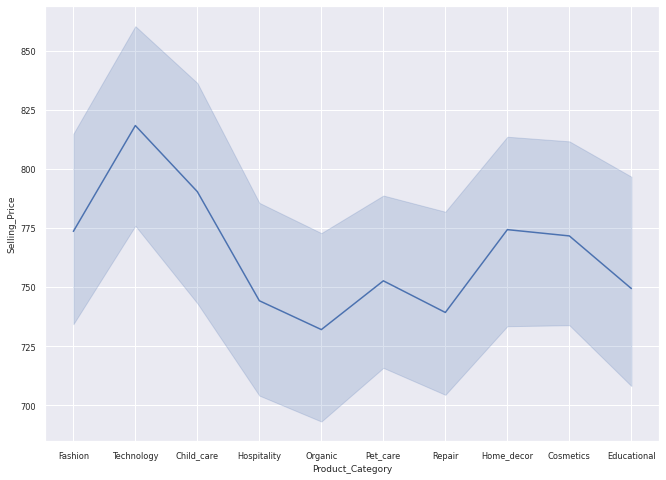

In [89]:
plt.figure(figsize=(11,8))
sns.lineplot(x='Product_Category',y='Selling_Price',data=new_test)


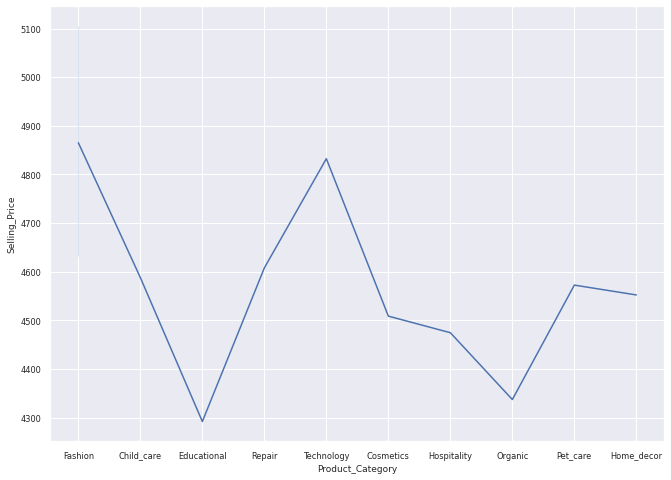

In [91]:
plt.figure(figsize=(11,8))
sns.lineplot(x='Product_Category',y='Selling_Price',data=train_original)


In [80]:
final_submision = new_test[['Product_id','Selling_Price']].copy()

In [81]:
final_submision.to_csv("pycaret_stack.csv",index=False)

In [82]:
final_submision.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,500.981316
1,ACCEGCATKHNRXUHW,328.228626
2,NKCE6GJ5XVJDXNNZ,1748.493703
3,NKCEB8BK3ZXDHDHM,1320.360404
4,TOPEFDXSAHRNPF94,815.666397


In [84]:
train_original[train_original['Product_id']=="NKCEB8BK3ZXDHDHM"]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
